# LL-based kinematic variability

Use the log-likelihood of syllable execution from instance to instance to make a claim about kinematic variability.

Can also use scalars like height, length, width to make the same claim.
It's possible that the log-likelihood is less sensitive to syllable duration though.

In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm.auto import tqdm
from aging.plotting import format_plots, figure

In [2]:
format_plots()

In [3]:
file_path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/all_data_pca/ar_log_likelihoods.h5')
syllable_h5 = file_path.with_name("syllables.h5")

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_05/ontogeny_males_clean_pseudotime_v02.parquet')

In [5]:
uuid_age_map = df.reset_index()[['age', 'uuid']].set_index('uuid')

In [6]:
# data = {}
# syllables = {}
syll_dist = {}
syllable_to_test = 46
with h5py.File(file_path, 'r') as h5f, h5py.File(syllable_h5, 'r') as syllable_h5f:
    uuids = list(filter(lambda x: x in uuid_age_map.index, h5f))
    for uuid in tqdm(uuids):
        lls = h5f[uuid][()]
        mask = np.all(lls == 0, axis=1)
        lls[mask] = np.nan
        # data[(uuid, uuid_age_map.loc[uuid].iloc[0])] = lls
        sylls = syllable_h5f[uuid][()]
        # syllables[(uuid, uuid_age_map.loc[uuid].iloc[0])] = sylls

        onsets = np.where(pd.Series(sylls).diff() != 0)[0]
        duration = np.diff(onsets)
        onsets = onsets[:-1]
        seq = sylls[onsets]
        onset_mask = np.zeros_like(sylls)
        onset_mask[onsets] = 1
        trials = np.cumsum(onset_mask)
        ll_df = pd.DataFrame(lls, columns=map(str, range(lls.shape[1])))
        ll_df['syllables'] = sylls
        ll_df['trials'] = trials
        syll_23_dist = ll_df.query('syllables == @syllable_to_test').groupby('trials', sort=False)[f'{syllable_to_test}'].mean()
        syll_dist[(uuid, uuid_age_map.loc[uuid].iloc[0])] = syll_23_dist

  0%|          | 0/213 [00:00<?, ?it/s]

In [8]:
# keep_syllables

In [9]:
melted = []
for k, v in syll_dist.items():
    melted.append(pd.DataFrame({'age': k[1], 'll': v.mean()}, index=[0]))
melted = pd.concat(melted, ignore_index=True)

[Text(0, 0.5, 'Log Likelihood'),
 Text(0.5, 0, 'Age (weeks)'),
 Text(0.5, 1.0, 'Syllable 46')]

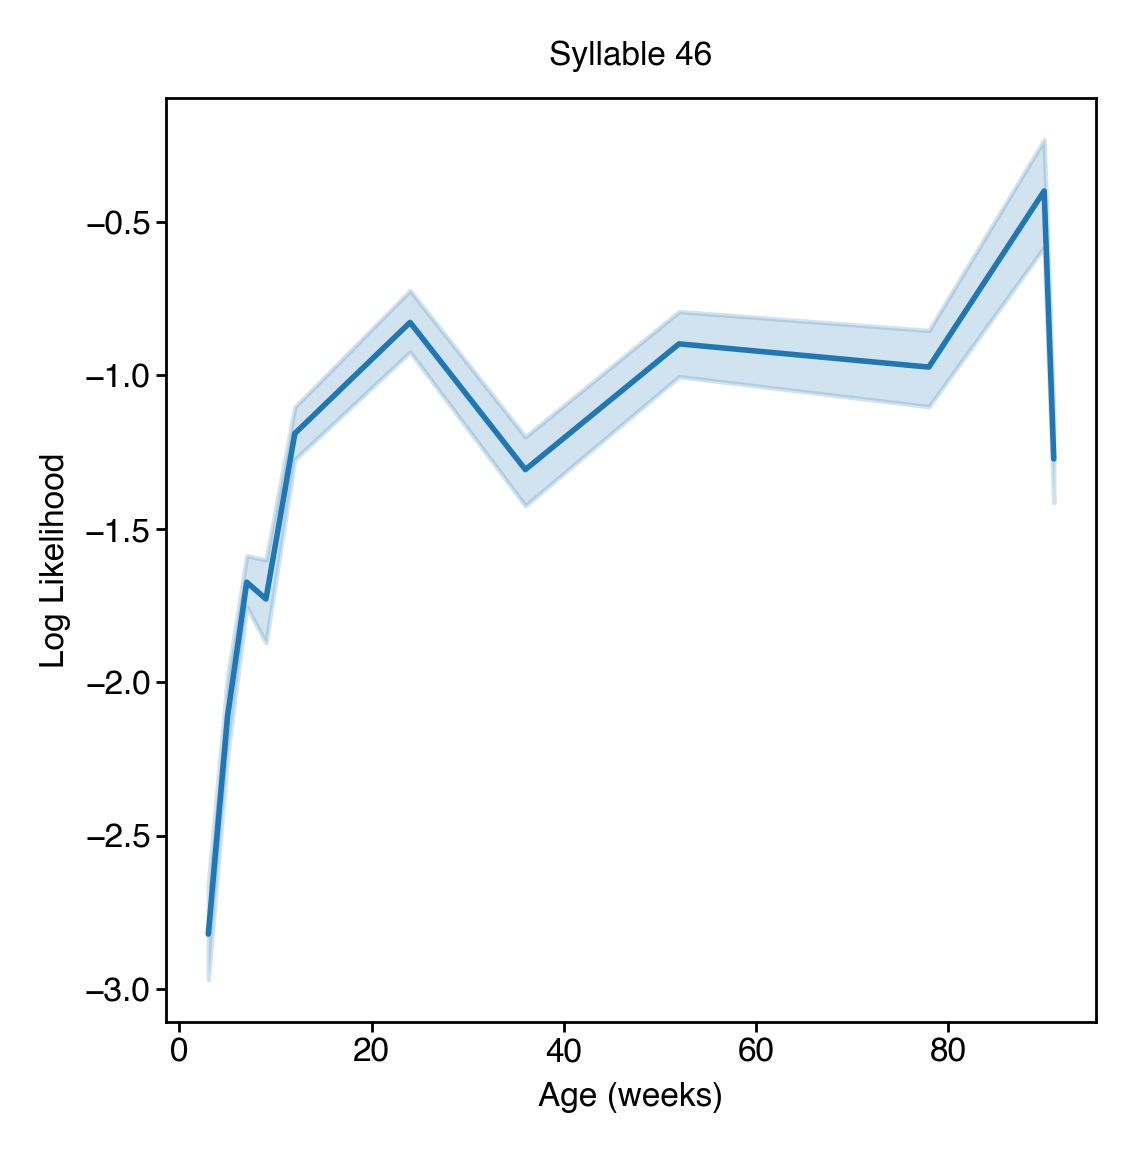

In [10]:
ax = sns.lineplot(data=melted, x='age', y='ll')
ax.set(ylabel="Log Likelihood", xlabel="Age (weeks)", title=f"Syllable {syllable_to_test}")

In [11]:
melted = []
for k, v in syll_dist.items():
    melted.append(pd.DataFrame({'age': k[1], 'll': v.std()}, index=[0]))
melted = pd.concat(melted, ignore_index=True)

[Text(0, 0.5, 'Log Likelihood STD'),
 Text(0.5, 0, 'Age (weeks)'),
 Text(0.5, 1.0, 'Syllable 46')]

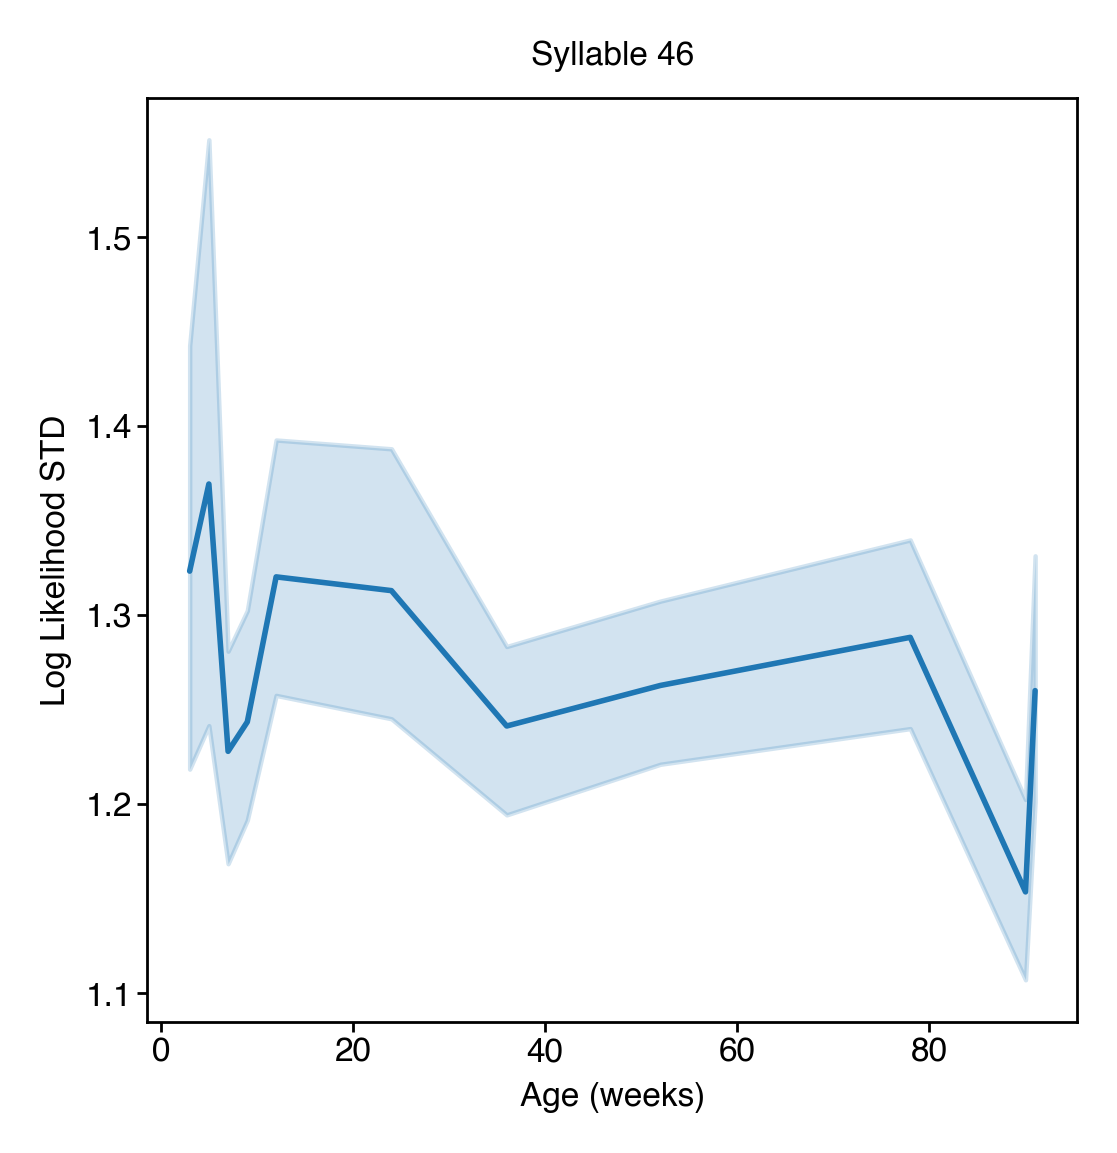

In [12]:
ax = sns.lineplot(data=melted, x='age', y='ll')
ax.set(ylabel="Log Likelihood STD", xlabel="Age (weeks)", title=f"Syllable {syllable_to_test}")

In [98]:
# find sections where LL is zero across all syllables (columns)

In [ ]:
figure(3, 1.5)
plt.imshow(item[:1000].T, aspect='auto', cmap='viridis', interpolation='none', vmax=10)
plt.colorbar()

## Observe LL distribution for a syllable

In [13]:
keep_syllables

NameError: name 'keep_syllables' is not defined

In [14]:
for trial, _df in ll_df.query('syllables == 23').groupby('trials'):
    break

In [15]:
trial

5

In [16]:
_df['23']

61   -5.166788
62    1.710208
63    1.902868
64    1.955401
65    2.051745
66   -1.986754
67    0.376425
68    0.678863
69    0.594802
70   -1.827377
Name: 23, dtype: float32

<Axes: xlabel='23', ylabel='Count'>

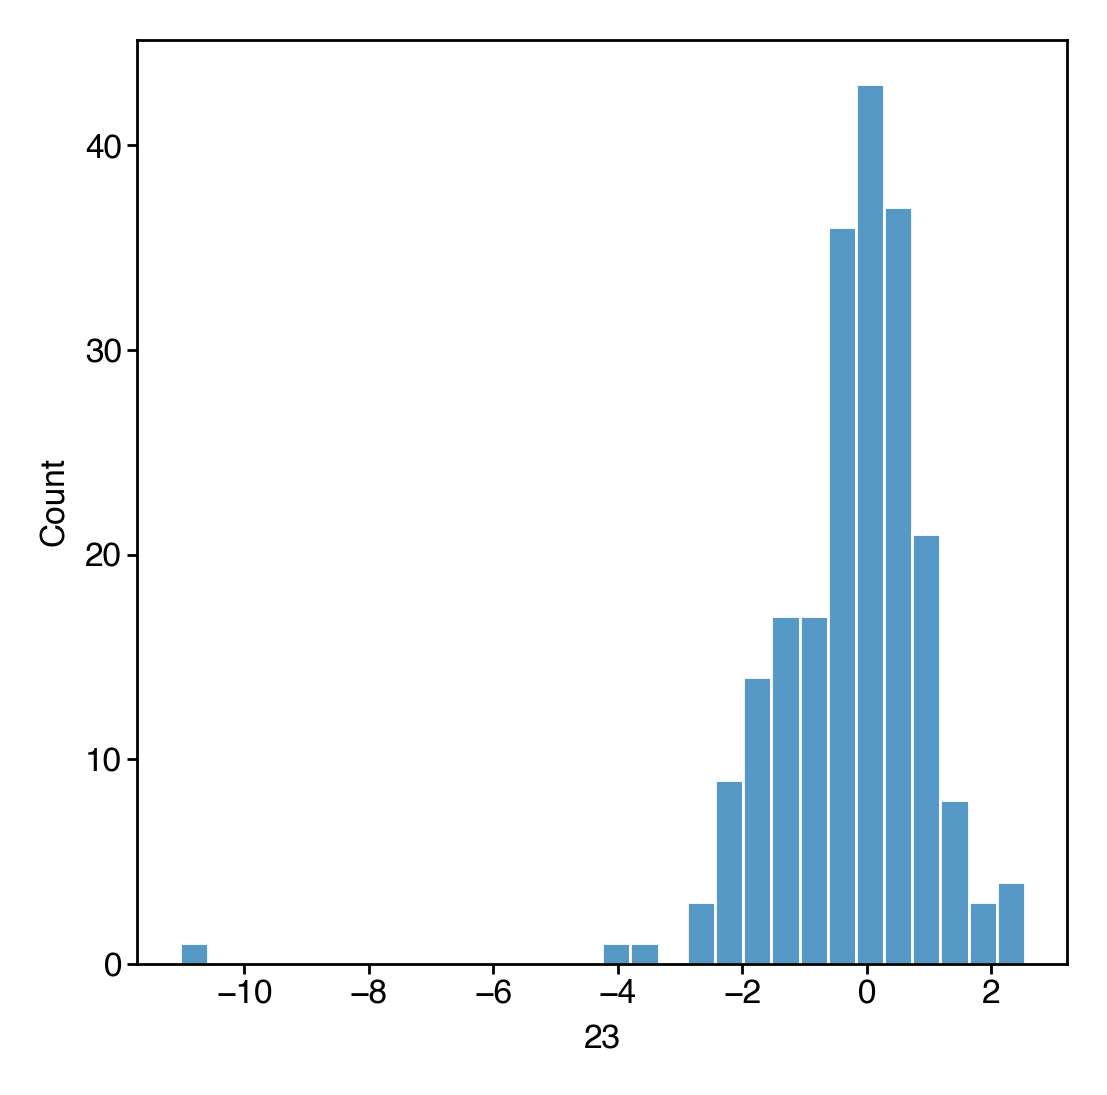

In [17]:
sns.histplot(ll_df.query('syllables == 23').groupby('trials', sort=False)['23'].mean())

In [18]:
keep_syllables

NameError: name 'keep_syllables' is not defined

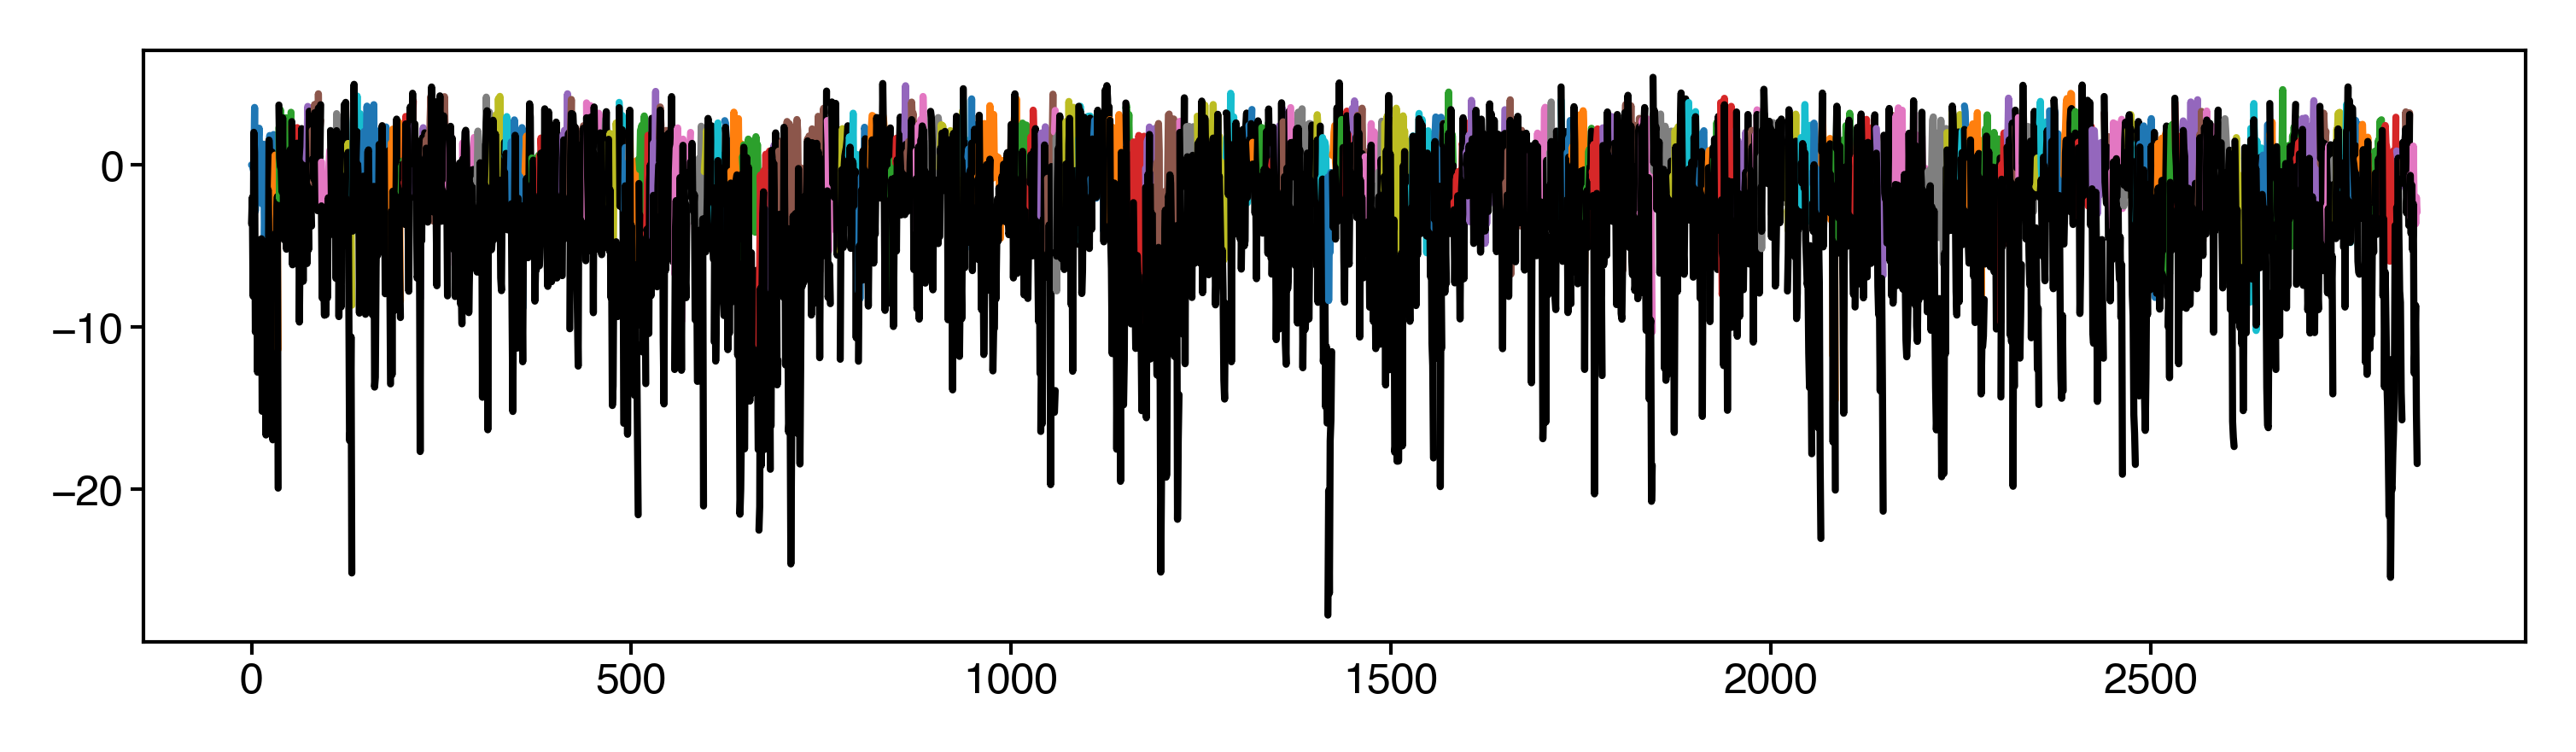

In [21]:
figure(6, 1.5)
for trial, _df in ll_df.query('syllables == @syllable_to_test').reset_index(drop=True).groupby('trials'):
    plt.plot(_df[f'{syllable_to_test}'])
    # plt.plot(_df['35'], color='k')